# Map basins for drought manuscript
Editor has requested that all basins included be mapped.  Make this map and color by...buffering effect?  Number the basins, show glacier cover?

11 Aug 2025 | EHU

In [6]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

In [4]:
basin_file = '/Users/eultee/Library/CloudStorage/OneDrive-NASA/Data/Runoff-intercomp/glacier-basins/glacier_basins.shp'
sf = shapefile.Reader(basin_file)
sf

We will use the Cartopy Reader instead of Shapefile reader to plot the shapes.  Use Finn's summary file to color the basins by their glacier area fraction.

In [29]:
FW_summary_file = '/Users/eultee/Library/CloudStorage/OneDrive-NASA/Data/Runoff-intercomp/Summary-statistics/MASTER_GloGEM.csv'

glacier_cover = pd.read_csv(FW_summary_file, index_col=0).loc[:, 'GlacierAreaFrac'] 

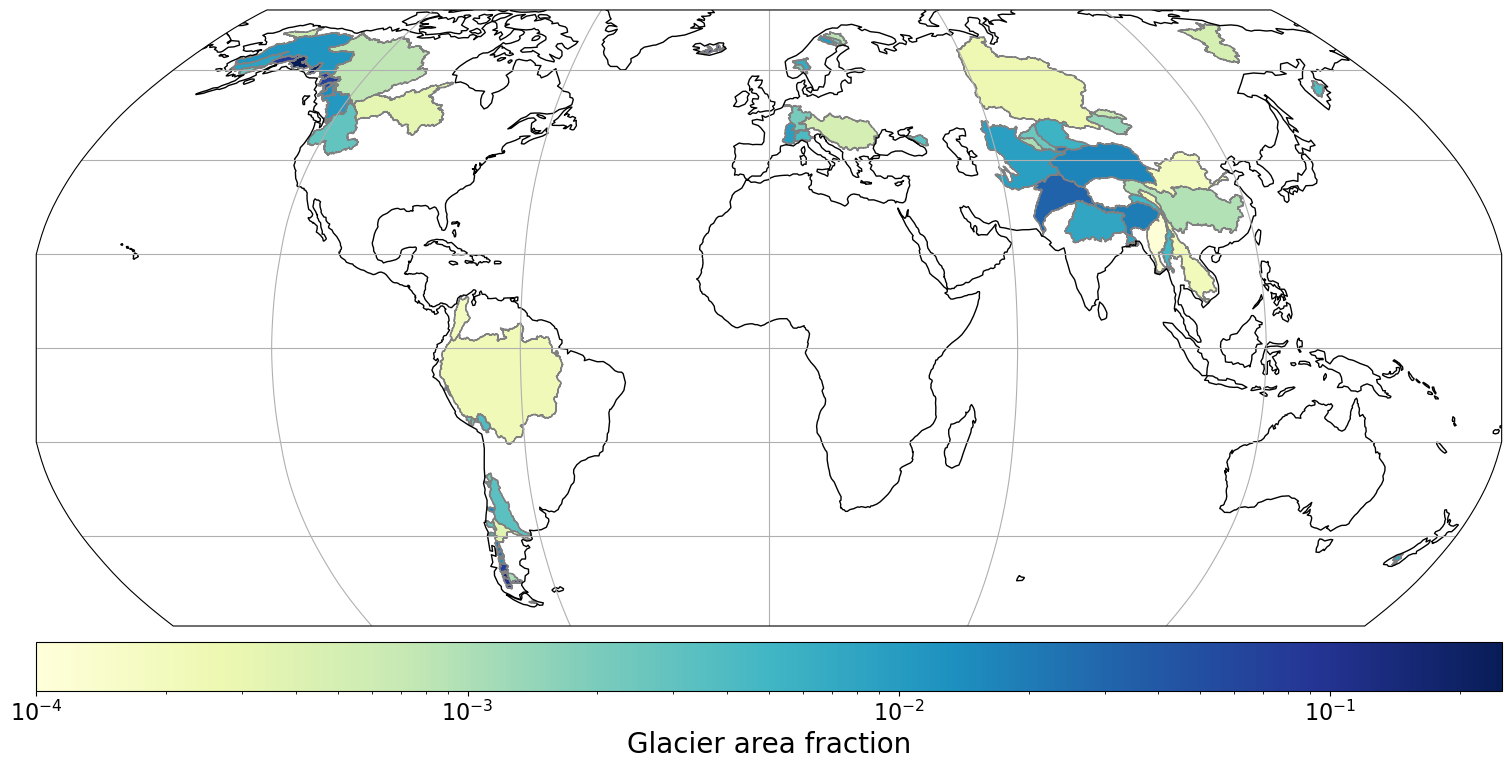

In [199]:
from cartopy.io.shapereader import Reader
from matplotlib import cm
import matplotlib.colors as colors

AF_cmap = plt.get_cmap('viridis')

reader = Reader(basin_file)
basins = reader.records()

geometries = []
area_frac = []

for b in basins:
    geometries.append(b.geometry)
    area_frac.append(glacier_cover[b.attributes['RIVER_BASI'].split(' (')[0]])
    
fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson()) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30)
cbar.set_label('Glacier area fraction', size=20)
cbar.ax.tick_params(labelsize=16)

ax.coastlines(); ax.gridlines();
ax.set_extent([-180, 180, -60, 75], crs=ccrs.PlateCarree())
# plt.tight_layout()

## Make regional subplots to add name annotations

### North America

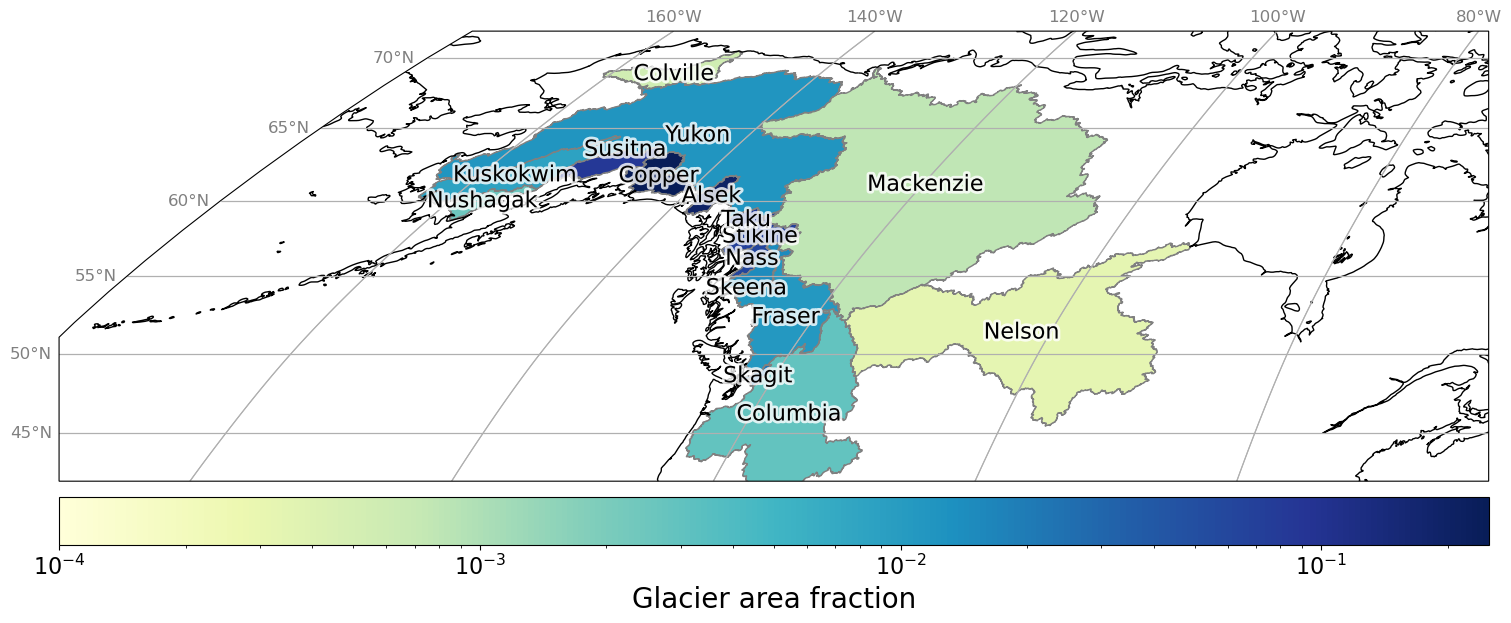

In [220]:
import matplotlib.patheffects as PathEffects

region_bbox = [-170, -79, ## lon range
            42, 72] ## lat range

basins_again = reader.records() ## refresh the iterator, already used above
        

fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson(),
             extent=region_bbox) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

for b in basins_again:
    basin_name = b.attributes['RIVER_BASI'].split(' (')[0]
    basin_label = ' '.join([s.capitalize() for s in basin_name.split(' ')])
    
    if basin_label=='Lake Balkhash':
        basin_label = 'Balkhash'
    elif basin_label=='Jokulsa A Fjollum':
        basin_label = 'Jokulsa A Fj.'
    else:
        pass

    label_x = b.geometry.centroid.x
    label_y = b.geometry.centroid.y

    
    if basin_label=='Susitna':
        label_y +=1
    if basin_label=='Skeena':
        label_y -=1
        
    if (label_x>region_bbox[0] and label_x<region_bbox[1]) and (label_y>region_bbox[2] and label_y<region_bbox[3]):
        ax.text(label_x, label_y, basin_label, size=16, color='k',
                ha='center', va='center', transform=ccrs.PlateCarree(),
               path_effects=[PathEffects.withStroke(linewidth=4, foreground="w", alpha=0.8)])
    else:
        pass
    

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30)
cbar.set_label('Glacier area fraction', size=20)
cbar.ax.tick_params(labelsize=16)

## label map grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
gl.right_labels=False
gl.bottom_labels=False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

ax.coastlines(); ax.gridlines();
ax.set_extent(region_bbox, crs=ccrs.PlateCarree())

### South America

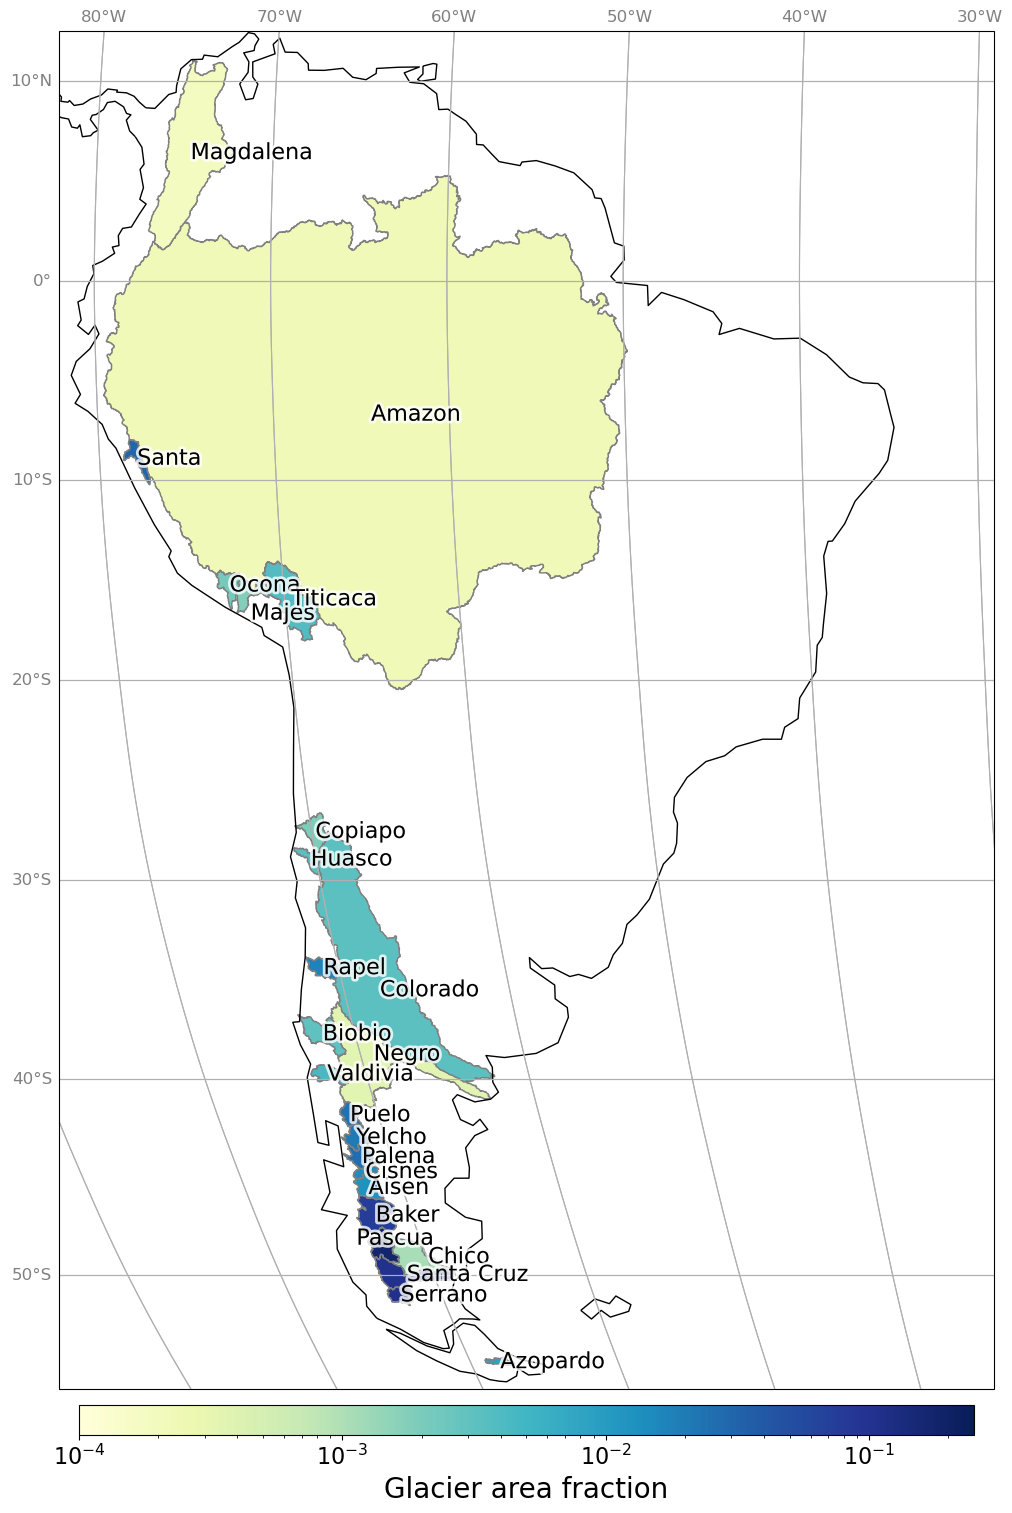

In [218]:
region_bbox = [-82, -35, ## lon range
            -56, 12.5] ## lat range

basins_again = reader.records() ## refresh the iterator, already used above
        

fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson(),
             extent=region_bbox) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

for b in basins_again:
    basin_name = b.attributes['RIVER_BASI'].split(' (')[0]
    basin_label = ' '.join([s.capitalize() for s in basin_name.split(' ')])
    
    if basin_label=='Lake Balkhash':
        basin_label = 'Balkhash'
    elif basin_label=='Jokulsa A Fjollum':
        basin_label = 'Jokulsa A Fj.'
    else:
        pass
        
    label_x = b.geometry.centroid.x
    label_y = b.geometry.centroid.y

    if basin_label=='Majes':
        label_y -=1
    if basin_label=='Chico':
        label_x +=1
    if basin_label=='Pascua':
        label_x -=1.5
        label_y +=0.5
    if basin_label=='Negro':
        label_y +=0.5
    if basin_label=='Colorado':
        label_y -=1
    
    if (label_x>region_bbox[0] and label_x<region_bbox[1]) and (label_y>region_bbox[2] and label_y<region_bbox[3]):
        ax.text(label_x, label_y, basin_label, size=16, color='k',
                ha='left', va='center', 
                transform=ccrs.PlateCarree(),
               path_effects=[PathEffects.withStroke(linewidth=4, foreground="w", alpha=0.8)])
    else:
        pass
    

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30, shrink=0.6)
cbar.set_label('Glacier area fraction', size=20)
cbar.ax.tick_params(labelsize=16)

## label map grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
gl.right_labels=False
gl.bottom_labels=False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

ax.coastlines(); ax.gridlines();
ax.set_extent(region_bbox, crs=ccrs.PlateCarree())

## Europe (inc. Caucasus)

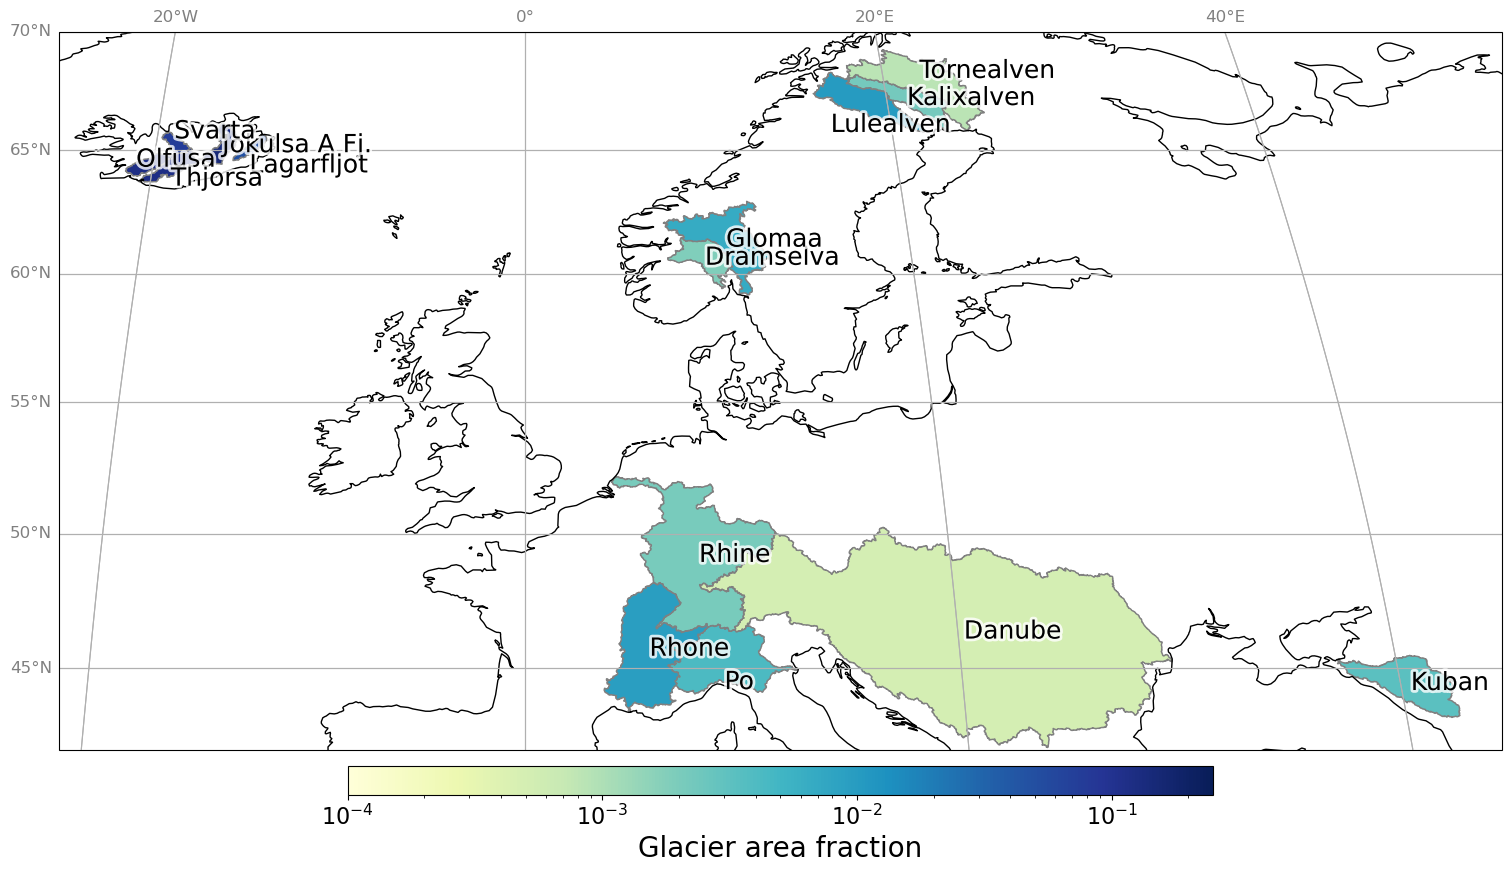

In [217]:
region_bbox = [-21, 44, ## lon range
            42, 70] ## lat range

basins_again = reader.records() ## refresh the iterator, already used above
        

fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson(),
             extent=region_bbox) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

for b in basins_again:
    basin_name = b.attributes['RIVER_BASI'].split(' (')[0]
    basin_label = ' '.join([s.capitalize() for s in basin_name.split(' ')])
    
    if basin_label=='Lake Balkhash':
        basin_label = 'Balkhash'
    elif basin_label=='Jokulsa A Fjollum':
        basin_label = 'Jokulsa A Fj.'
    else:
        pass
        
    label_x = b.geometry.centroid.x
    label_y = b.geometry.centroid.y

    if basin_label=='Thjorsa':
        label_y -=0.5
    if basin_label=='Olfusa':
        label_x -=0.7
        label_y +=0.2
    if basin_label=='Lagarfljot':
        # label_x -=1.5
        label_y -=0.7
    if basin_label=='Svarta':
        label_y +=0.5
        label_x -=0.2
    if basin_label=='Lulealven':
        label_y -=1
        label_x -=2
    if basin_label=='Tornealven':
        label_y +=0.5
    if basin_label=='Po':
        label_y -=0.8
    
    if (label_x>region_bbox[0] and label_x<region_bbox[1]) and (label_y>region_bbox[2] and label_y<region_bbox[3]):
        ax.text(label_x, label_y, basin_label, size=18, color='k',
                ha='left', va='center', 
                transform=ccrs.PlateCarree(),
               path_effects=[PathEffects.withStroke(linewidth=4, foreground="w", alpha=0.8)])
    else:
        pass
    

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30, shrink=0.6)
cbar.set_label('Glacier area fraction', size=20)
cbar.ax.tick_params(labelsize=16)

## label map grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
gl.right_labels=False
gl.bottom_labels=False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

ax.coastlines(); ax.gridlines();
ax.set_extent(region_bbox, crs=ccrs.PlateCarree())

### Asia

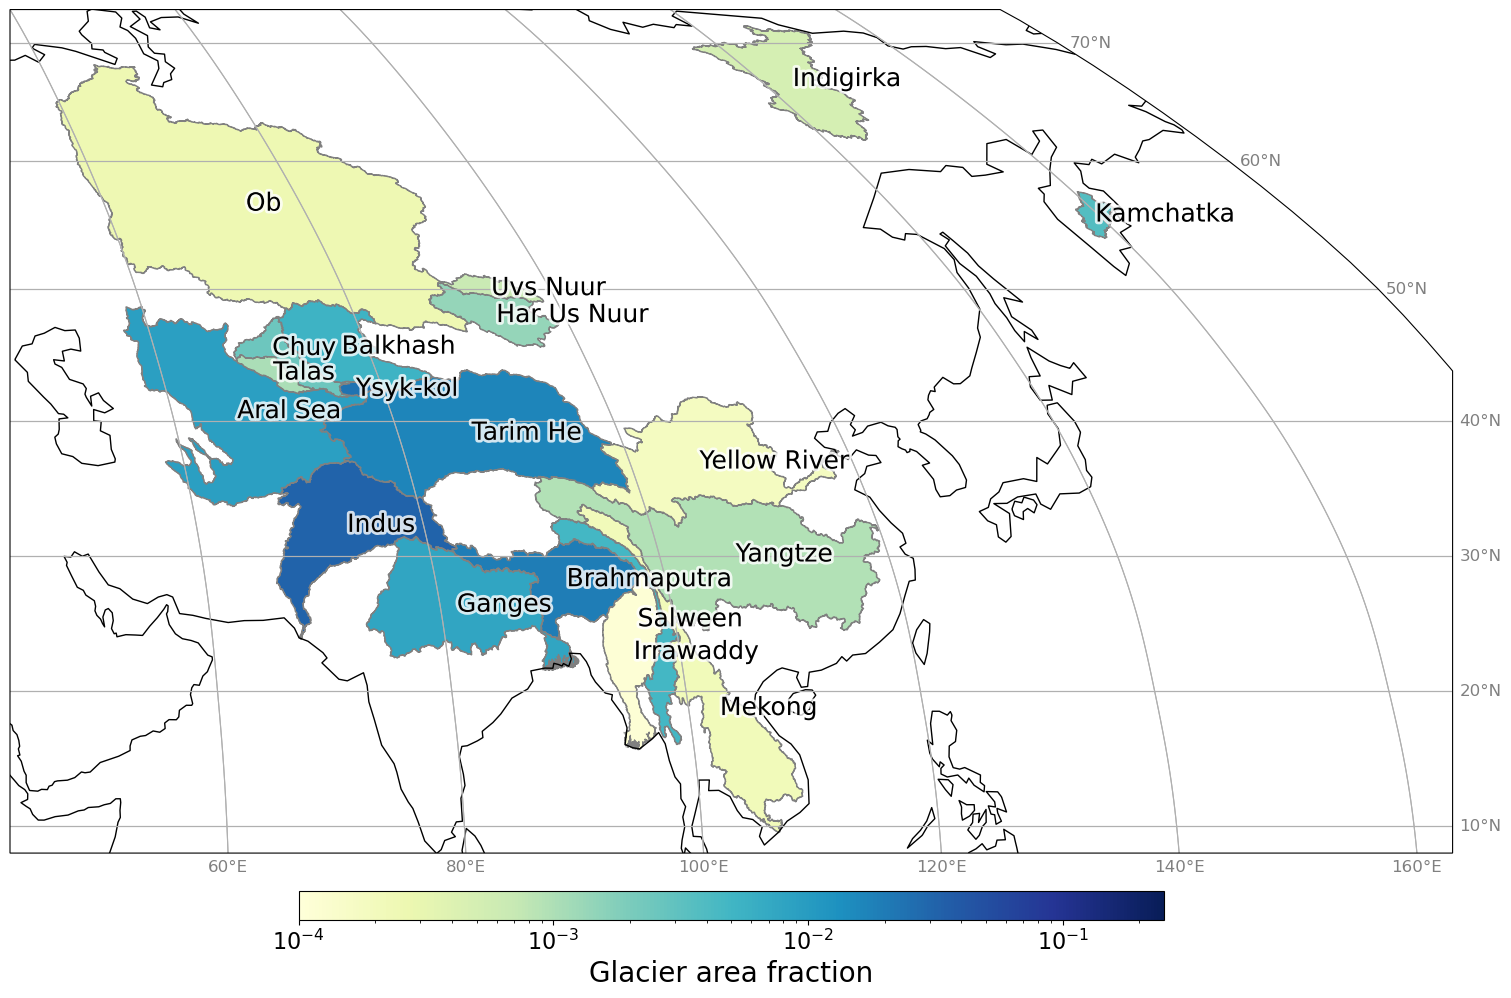

In [215]:
region_bbox = [60, 163, ## lon range
            8, 73] ## lat range

basins_again = reader.records() ## refresh the iterator, already used above
        

fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson(),
             extent=region_bbox) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

for b in basins_again:
    basin_name = b.attributes['RIVER_BASI'].split(' (')[0]
    basin_label = ' '.join([s.capitalize() for s in basin_name.split(' ')])
    
    if basin_label=='Lake Balkhash':
        basin_label = 'Balkhash'
    elif basin_label=='Jokulsa A Fjollum':
        basin_label = 'Jokulsa A Fj.'
    else:
        pass
        
    label_x = b.geometry.centroid.x
    label_y = b.geometry.centroid.y

    if basin_label=='Chuy':
        label_x -=1.0
        label_y +=0.8

    
    if (label_x>region_bbox[0] and label_x<region_bbox[1]) and (label_y>region_bbox[2] and label_y<region_bbox[3]):
        ax.text(label_x, label_y, basin_label, size=18, color='k',
                ha='left', va='center', 
                transform=ccrs.PlateCarree(),
               path_effects=[PathEffects.withStroke(linewidth=4, foreground="w", alpha=0.8)])
    else:
        pass
    

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30, shrink=0.6)
cbar.set_label('Glacier area fraction', size=20)
cbar.ax.tick_params(labelsize=16)

## label map grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
gl.left_labels=False
gl.top_labels=False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}

ax.coastlines(); ax.gridlines();
ax.set_extent(region_bbox, crs=ccrs.PlateCarree())

### New Zealand

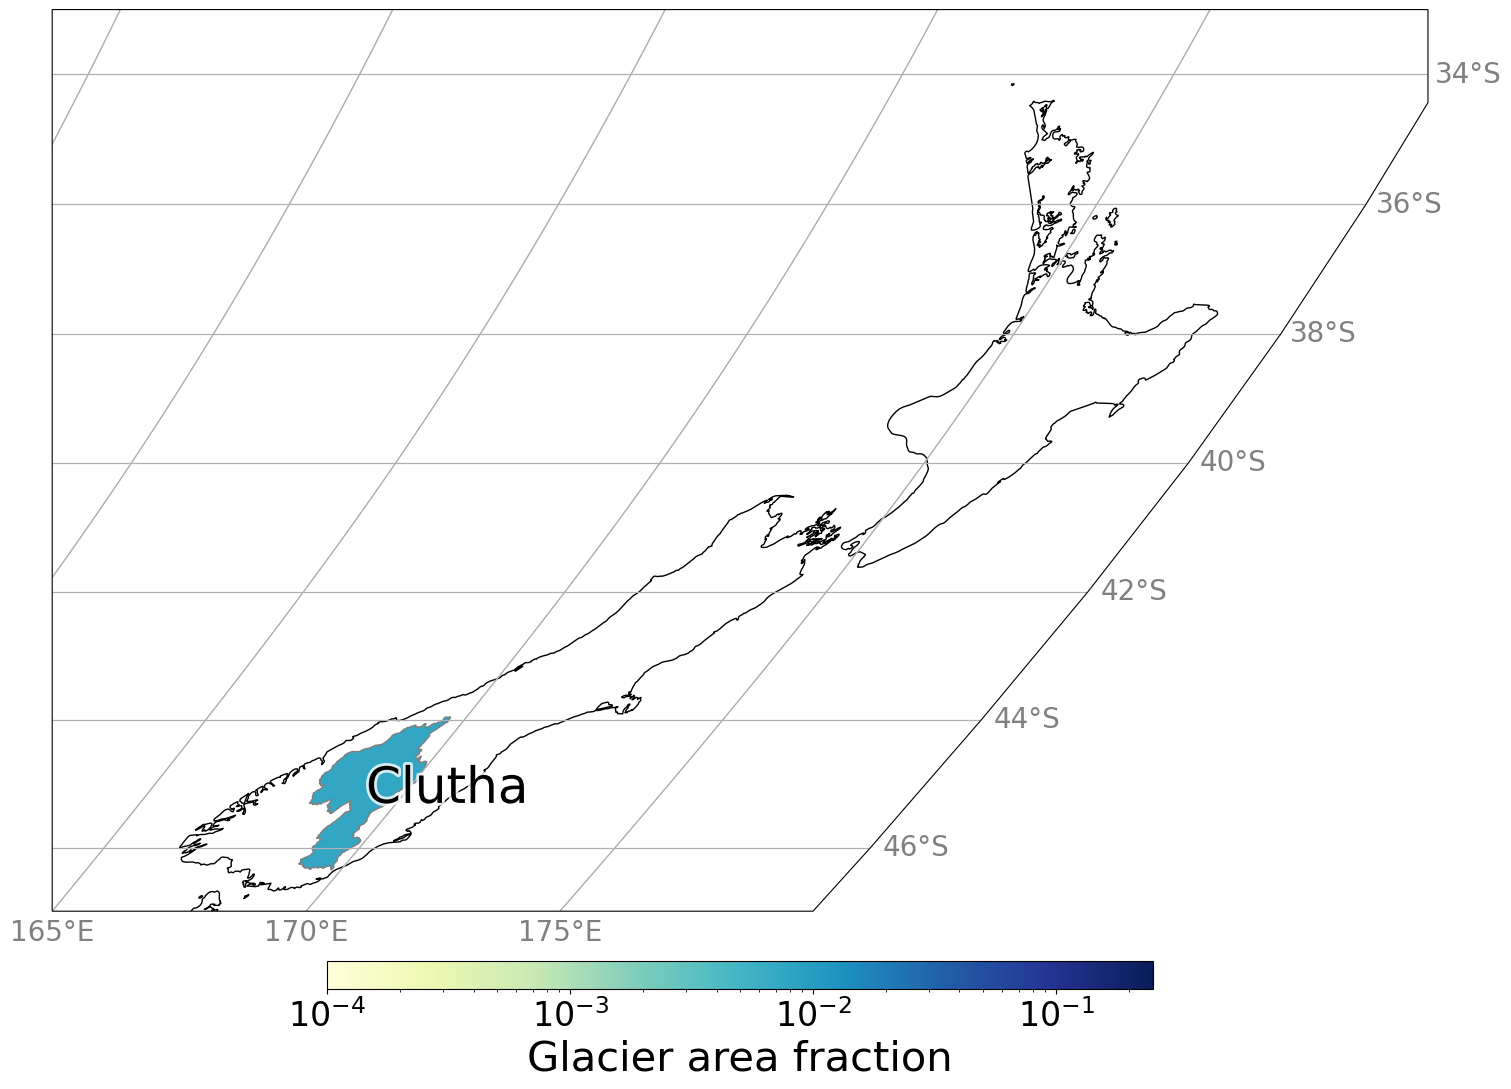

In [221]:
region_bbox = [165, 179, ## lon range
            -47, -33] ## lat range

basins_again = reader.records() ## refresh the iterator, already used above
        

fig = plt.figure(figsize=(15,15), layout='constrained')
ax = plt.axes(projection=ccrs.Robinson(),
             extent=region_bbox) ## set the projection to display

art = ax.add_geometries(geometries, crs=ccrs.PlateCarree(),
                        array = area_frac, cmap='YlGnBu',
                        norm= colors.LogNorm(vmin=1e-4, vmax=0.25),
                        edgecolor='grey'
                       )

for b in basins_again:
    basin_name = b.attributes['RIVER_BASI'].split(' (')[0]
    basin_label = ' '.join([s.capitalize() for s in basin_name.split(' ')])
    
    if basin_label=='Lake Balkhash':
        basin_label = 'Balkhash'
    elif basin_label=='Jokulsa A Fjollum':
        basin_label = 'Jokulsa A Fj.'
    else:
        pass
        
    label_x = b.geometry.centroid.x
    label_y = b.geometry.centroid.y

    if basin_label=='Chuy':
        label_x -=0.5
        label_y +=0.5

    
    if (label_x>region_bbox[0] and label_x<region_bbox[1]) and (label_y>region_bbox[2] and label_y<region_bbox[3]):
        ax.text(label_x, label_y, basin_label, size=36, color='k',
                ha='left', va='center', 
                transform=ccrs.PlateCarree(),
               path_effects=[PathEffects.withStroke(linewidth=4, foreground="w", alpha=0.8)])
    else:
        pass
    

cbar = plt.colorbar(art, orientation='horizontal', pad=0.01, aspect=30, shrink=0.6)
cbar.set_label('Glacier area fraction', size=30)
cbar.ax.tick_params(labelsize=24)

## label map grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
gl.left_labels=False
gl.top_labels=False
gl.xlabel_style = {'size': 20, 'color': 'gray'}
gl.ylabel_style = {'size': 20, 'color': 'gray'}

ax.coastlines(); ax.gridlines();
ax.set_extent(region_bbox, crs=ccrs.PlateCarree())